<a href="https://colab.research.google.com/github/econ105/AI/blob/main/Python/domestic/marketyieldetc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nolds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 5.8 MB/s eta 0:00:00


In [4]:
from google.colab import files
uploaded = files.upload()


Saving v3_econometrics.xlsx to v3_econometrics.xlsx


Class A-E Summary (first 5 years):
   Year  VacancyRate_A  VacancyRate_B  VacancyRate_C  VacancyRate_D  \
0  1980            NaN            NaN            NaN            NaN   
1  1981            NaN            NaN            NaN            NaN   
2  1982            NaN            NaN            NaN            NaN   
3  1983            NaN            NaN            NaN            NaN   
4  1984            NaN            NaN            NaN            NaN   

   VacancyRate_E  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


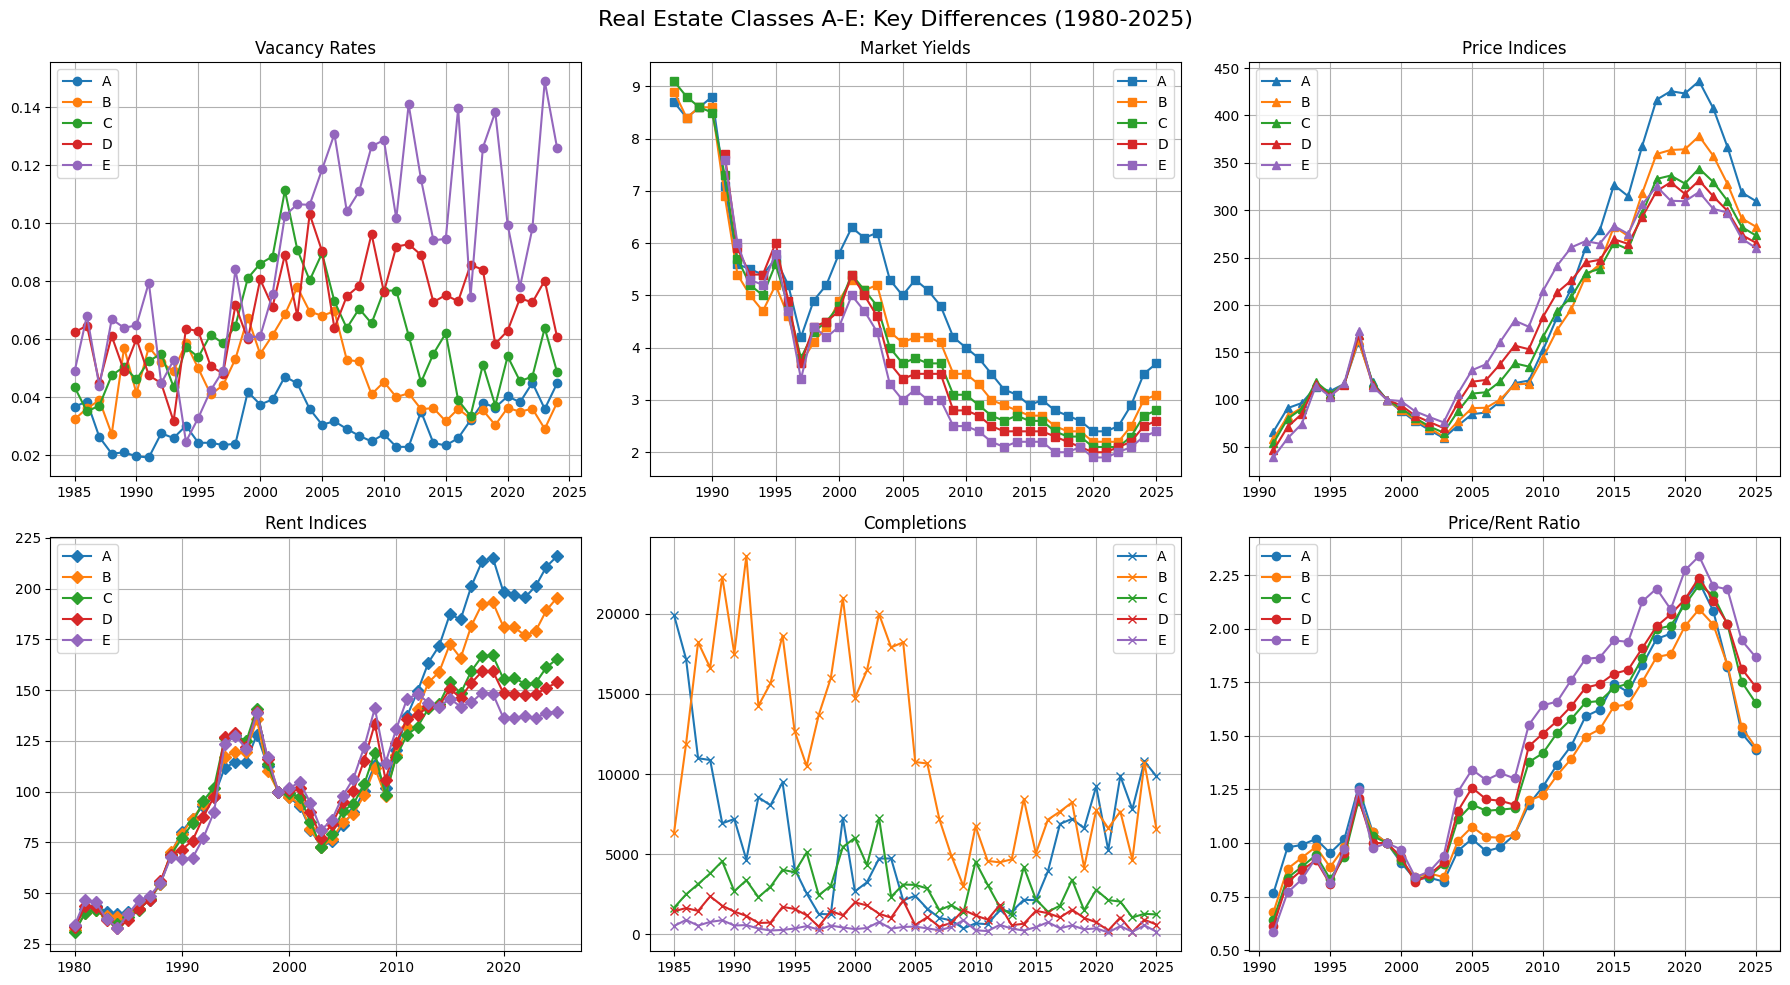


Class Differences Summary:
  Class  Avg_VacRate  Avg_Yield  Price_Vol  Rent_Vol  P/R_2025
0     A        0.031      4.779    130.830    57.977     1.434
1     B        0.047      4.277    108.876    50.914     1.445
2     C        0.060      4.195     96.455    42.530     1.653
3     D        0.070      3.589     92.592    40.825     1.728
4     E        0.089      3.357     92.617    38.682     1.867
✅ Saved: class_differences_summary.csv


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nolds

# =========================
# 1. LOAD & PREPARE DATA
# =========================
file_name = "v3_econometrics.xlsx"
df = pd.read_excel(file_name, sheet_name=0)

# Calculate vacancy RATES (Vacancy/Stock)
for cls in ['A','B','C','D','E']:
    df[f'VacancyRate_{cls}'] = df[f'Vacancy_{cls}'] / df[f'Stock_{cls}']

print("Class A-E Summary (first 5 years):")
print(df[['Year', 'VacancyRate_A', 'VacancyRate_B', 'VacancyRate_C',
          'VacancyRate_D', 'VacancyRate_E']].round(3).head())

# =========================
# 2. VISUALIZE CLASS DIFFERENCES (FIXED)
# =========================
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Real Estate Classes A-E: Key Differences (1980-2025)', fontsize=16)

classes = ['A','B','C','D','E']

# **FIXED: Loop over columns individually**
for i, cls in enumerate(classes):
    # Vacancy Rates
    axes[0,0].plot(df['Year'], df[f'VacancyRate_{cls}'], marker='o', label=cls)
    # Yields
    axes[0,1].plot(df['Year'], df[f'MarketYield_{cls}'], marker='s', label=cls)
    # Price Indices
    axes[0,2].plot(df['Year'], df[f'PriceIndex_{cls}'], marker='^', label=cls)
    # Rent Indices
    axes[1,0].plot(df['Year'], df[f'RentIndex_{cls}'], marker='D', label=cls)
    # Completions
    axes[1,1].plot(df['Year'], df[f'Completions_{cls}'], marker='x', label=cls)
    # Price/Rent ratio
    axes[1,2].plot(df['Year'], df[f'PriceIndex_{cls}']/df[f'RentIndex_{cls}'],
                   marker='o', label=cls)

# Formatting
axes[0,0].set_title('Vacancy Rates'); axes[0,0].legend(); axes[0,0].grid(True)
axes[0,1].set_title('Market Yields'); axes[0,1].legend(); axes[0,1].grid(True)
axes[0,2].set_title('Price Indices'); axes[0,2].legend(); axes[0,2].grid(True)
axes[1,0].set_title('Rent Indices'); axes[1,0].legend(); axes[1,0].grid(True)
axes[1,1].set_title('Completions'); axes[1,1].legend(); axes[1,1].grid(True)
axes[1,2].set_title('Price/Rent Ratio'); axes[1,2].legend(); axes[1,2].grid(True)

plt.tight_layout()
plt.show()

# =========================
# 3. SUMMARY STATISTICS TABLE
# =========================
summary = pd.DataFrame({
    'Class': classes,
    'Avg_VacRate': [df[f'VacancyRate_{c}'].mean() for c in classes],
    'Avg_Yield': [df[f'MarketYield_{c}'].mean() for c in classes],
    'Price_Vol': [df[f'PriceIndex_{c}'].std() for c in classes],
    'Rent_Vol': [df[f'RentIndex_{c}'].std() for c in classes],
    'P/R_2025': [df[f'PriceIndex_{c}'].iloc[-1]/df[f'RentIndex_{c}'].iloc[-1] for c in classes]
}).round(3)

print("\nClass Differences Summary:")
print(summary)

# =========================
# 4. SAVE SUMMARY
# =========================
summary.to_csv('class_differences_summary.csv', index=False)
print("✅ Saved: class_differences_summary.csv")
